# 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1) Import dataframe

In [2]:
# Creating a path variable
path = r'C:\Users\Aaron\CareerFoundry\Instacart Basket Analysis'

In [3]:
# Importing the most recent data set
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [33]:
# To make sure entire dataframe is displayed, we'll input this:
pd.options.display.max_columns = None

In [34]:
# Checking the dataframe
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spending_flag,median_since_prior_orders,order_frequency_flag,first_name,last_name,state,age,n_dependants,income,_merge
0,2539329.0,1.0,1.0,2.0,8.0,11.0,196,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both


# 2) Create bar chart, histogram, scatterplot, and line chart using a sample subset for line chart

#### Following the instructions from the exercise, I'll create a sample subset first.

## Creating a sample subset
Sample will have 70/30 split of the subset of the df

In [5]:
np.random.seed(4)

In [6]:
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [7]:
dev

array([False,  True, False, ...,  True,  True,  True])

#### Splitting the dataframe into 2 samples

In [8]:
# Storing 70% of sample in dataframe big
big = ords_prods_cust[dev]

In [9]:
# Storing 30% of sample in dataframe small
small = ords_prods_cust[~dev]

#### Checking to see if samples match

In [10]:
len(ords_prods_cust)

30658154

In [11]:
len(big) + len(small)

30658154

They match!!

## Bar Chart (for orders day of week)

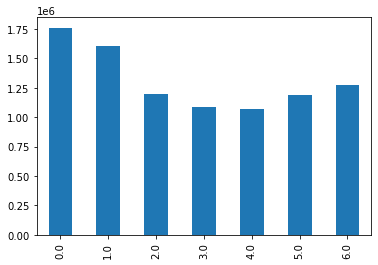

In [17]:
bar_1 = small['orders_day_of_week'].value_counts().sort_index().plot.bar()

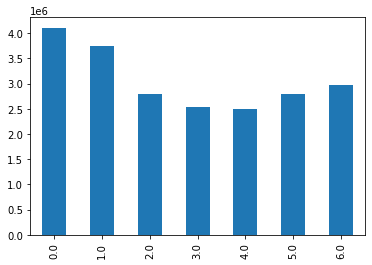

In [18]:
# Checking to see if it matches with other sample
bar_2 = big['orders_day_of_week'].value_counts().sort_index().plot.bar()

## Histogram (for prices)

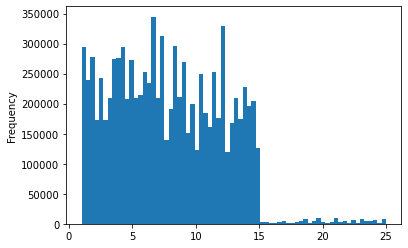

In [19]:
hist_1 = small['prices'].plot.hist(bins = 70)

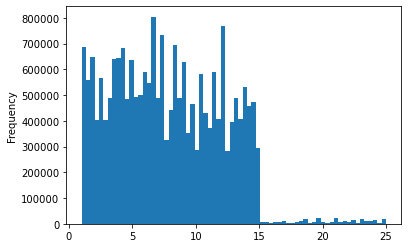

In [20]:
hist_2 = big['prices'].plot.hist(bins = 70)

## Scatterplot (for prices)

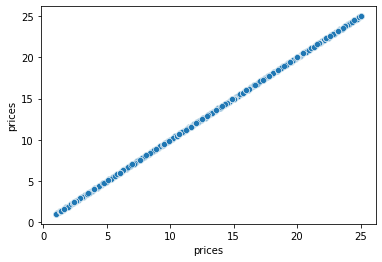

In [21]:
scat_1 = sns.scatterplot(x = 'prices', y = 'prices', data = small)

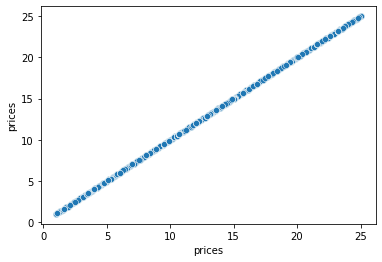

In [22]:
scat_2 = sns.scatterplot(x = 'prices', y = 'prices', data = big)

## Line Chart (for orders day of week and prices)

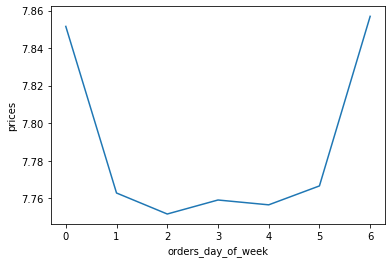

In [23]:
line_1 = sns.lineplot(data = small, x = 'orders_day_of_week', y = 'prices')

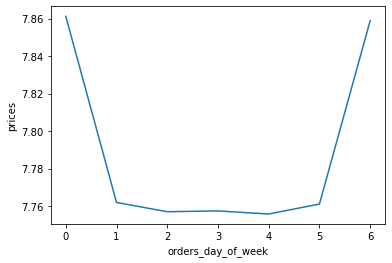

In [24]:
line_2 = sns.lineplot(data = big, x = 'orders_day_of_week', y = 'prices')

# 3) Histogram for order hour of day (order time in my dataframe)

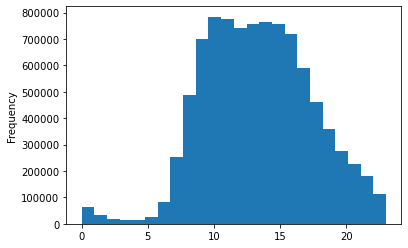

In [25]:
hist_3 = small['order_time'].plot.hist(bins = 24)

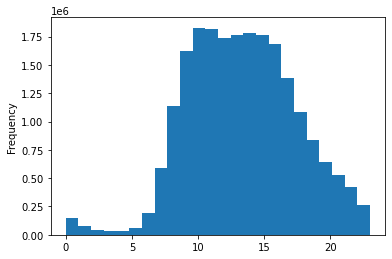

In [26]:
hist_4 = big['order_time'].plot.hist(bins = 24)

#### Description of histograms above

As we can see from both histograms, the busiest times of the day are 10 AM and 11 AM.

There's a slow build up of orders starting at 7 AM and it peaks at 10 AM. Continuous flow of orders throughout the day until about 4 PM. Afterwards, it slowly tapers down.

# 4) Bar chart for loyalty flag column

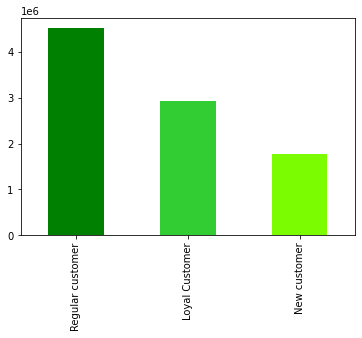

In [31]:
bar_3 = small['loyalty_flag'].value_counts().plot.bar(color = ['green', 'limegreen', 'lawngreen'])

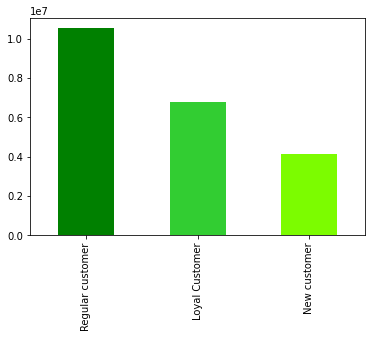

In [32]:
bar_4 = big['loyalty_flag'].value_counts().plot.bar(color = ['green', 'limegreen', 'lawngreen'])

# 5) Line chart for prices and hour of day

#### First, let's reduce our samples to contain only the columns necessary for the chart: Prices and Order Time

In [35]:
small_2 = small[['prices', 'order_time']]

In [36]:
big_2 = big[['prices', 'order_time']]

In [38]:
# Checking our new dataframes
small_2.shape

(9196649, 2)

In [39]:
big_2.shape

(21461505, 2)

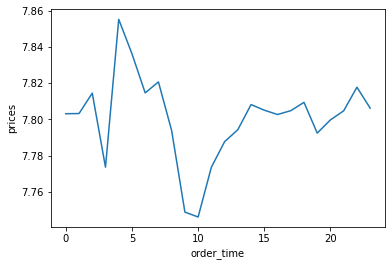

In [40]:
line_3 = sns.lineplot(data = small_2, x = 'order_time', y = 'prices')

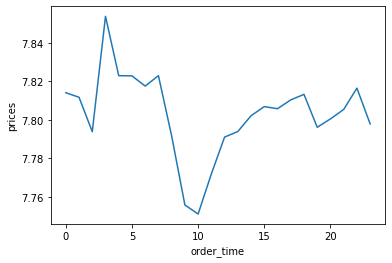

In [41]:
line_4 = sns.lineplot(data = big_2, x = 'order_time', y = 'prices')

It's interesting to see that the linechart shows that 10 AM is the time with the lowest price, when the the histogram showed us that it is the busiest time. Could it be that even though customers shop at 10 AM, they purchase the lower priced items during this time?

# 6) Line chart for age and number of dependents

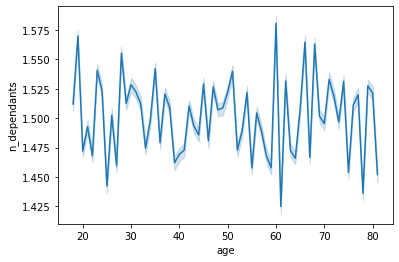

In [45]:
line_5 = sns.lineplot(data = small, x = 'age', y = 'n_dependants')

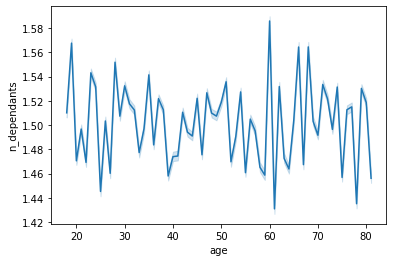

In [43]:
line_6 = sns.lineplot(data = big, x = 'age', y = 'n_dependants')

#### Description of line chart above
As you can see, there's not much of a trend going on as the line chart moves  sporadically. The highest point and the lowest point both belong to the age 60 group.

What I interpret from this line chart is that there is no trend or connection when it comes to age and number of dependents. Everyone has different life conditions and family situations.


# 7) Scatterplot for age and income

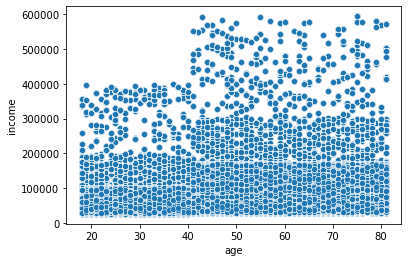

In [46]:
scat_3 = sns.scatterplot(x = 'age', y = 'income', data = small)

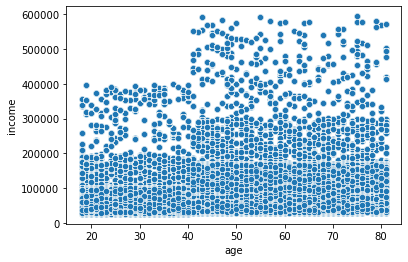

In [48]:
scat_4 = sns.scatterplot(x = 'age', y = 'income', data = big)

#### Description of scatterplot
It seems as if there is no trend or correlation between a customer's age and their income. This is possible especially with the increase of freshly graduated students being offered high paying jobs.

# 8) Exporting visualizations

## Exporting bar charts

In [49]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_bar_1.png'))

In [50]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_bar_2.png'))

In [51]:
bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_bar_3.png'))

In [52]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_bar_4.png'))

## Exporting histograms

In [53]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_hist_1.png'))

In [54]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_hist_2.png'))

In [55]:
hist_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_hist_3.png'))

In [56]:
hist_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_hist_4.png'))

## Exporting scatterplots

In [57]:
scat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_scat_1.png'))

In [58]:
scat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_scat_2.png'))

In [59]:
scat_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_scat_3.png'))

In [60]:
scat_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_scat_4.png'))

## Exporting line charts

In [61]:
line_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_line_1.png'))

In [62]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_line_2.png'))

In [63]:
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_line_3.png'))

In [64]:
line_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_line_4.png'))

In [65]:
line_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_line_5.png'))

In [66]:
line_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Task49_line_6.png'))